In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb

In [2]:
df= pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

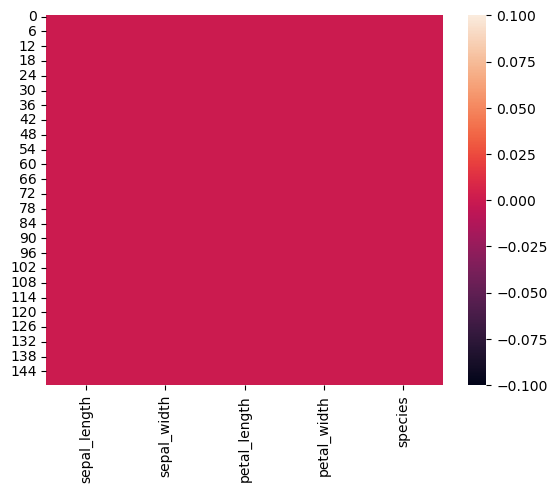

In [6]:
sns.heatmap(df.isnull())

In [7]:
# Getting features and target
X = df.drop(["species"], axis=1)
y = df["species"]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=36)

# Decision Tree

In [10]:

dt=tree.DecisionTreeClassifier(max_depth=5)


In [11]:
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5)

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.184\nsamples = 39\nvalue = [0, 35, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'

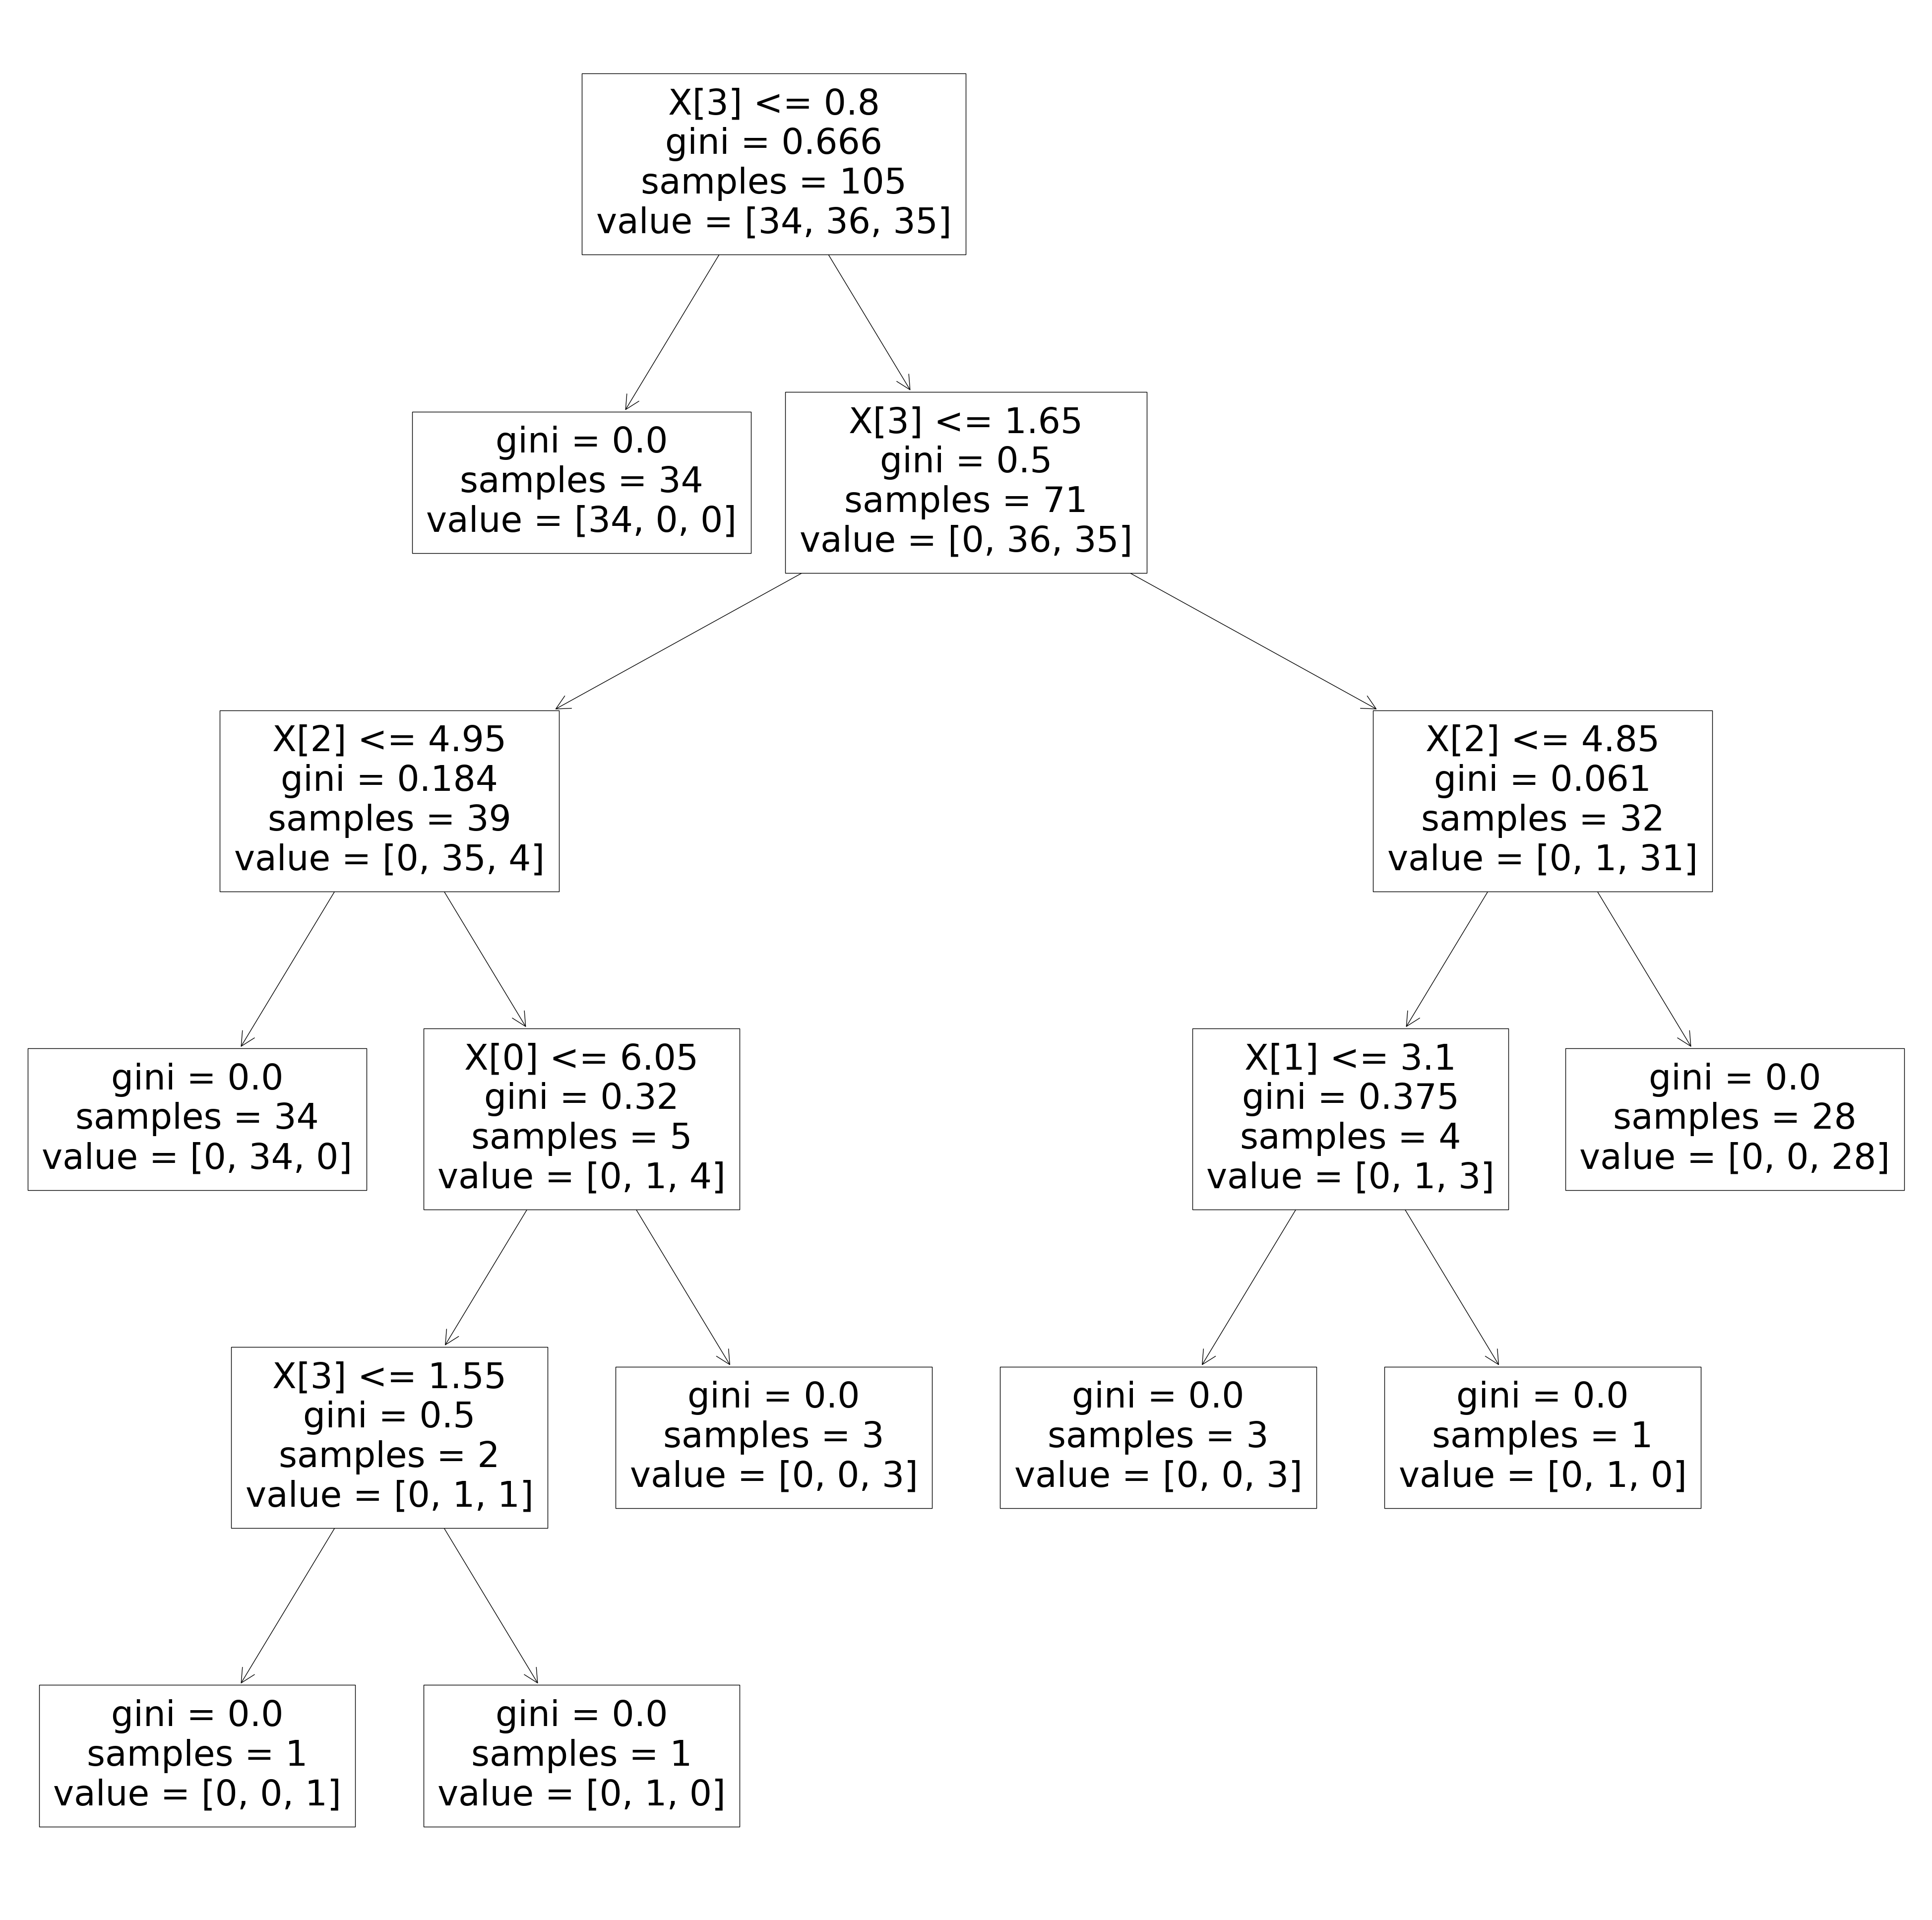

In [12]:

plt.figure(figsize=(50,50))
tree.plot_tree(dt)

In [13]:
##lets predict our model
y_pred = dt.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [14]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[16,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 15]], dtype=int64)

In [15]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [16]:
###IMPORTANCE OF VARIABLE
fi=pd.DataFrame({'feature':list(X_train.columns),
                 'importance':dt.feature_importances_}).\
                  sort_values('importance',ascending=False)

In [17]:
fi

,feature,importance
3,petal_width,0.884011
2,petal_length,0.085980
1,sepal_width,0.021434
0,sepal_length,0.008574


# Random Forest

In [18]:
from sklearn import ensemble


In [19]:
rf = ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)



RandomForestClassifier()

In [20]:
rf.score(X_test, y_test)

0.9777777777777777

In [21]:

y_predRF=rf.predict(X_test)
y_predRF

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], dtype=object)

In [22]:
print(classification_report(y_test,y_predRF))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [23]:

Prob_pred=rf.predict_proba(X_test)[:,1]
Prob_pred

array([0.96, 0.02, 0.99, 0.  , 0.  , 0.82, 0.9 , 0.99, 1.  , 1.  , 0.97,
       0.  , 0.04, 1.  , 0.  , 0.  , 0.  , 0.02, 0.04, 0.02, 0.  , 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 1.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  ,
       1.  ])

# Perform Classification using GradientBoosting Classifier

In [24]:
gb = ensemble.GradientBoostingClassifier(n_estimators=50)


In [25]:
gb.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=50)

In [26]:
gb.score(X_test, y_test)

0.9777777777777777

In [27]:
from sklearn.linear_model import LogisticRegression


In [28]:
lr=LogisticRegression(C=0.01)
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8761904761904762
0.8666666666666667


In [29]:
con = confusion_matrix(y_test , lr.predict(X_test))
con

array([[16,  0,  0],
       [ 0,  8,  6],
       [ 0,  0, 15]], dtype=int64)

In [30]:
print (classification_report(y_test , rf.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators = 15, learning_rate=0.25)
ada.fit(X_train,y_train)
print(ada.score(X_test , y_test))
print(ada.score(X_train,y_train))

0.9777777777777777
0.9047619047619048


In [32]:
con = confusion_matrix(y_test,ada.predict(X_test) )
print(con)

[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]


In [33]:
print (classification_report(y_test , ada.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [34]:
from sklearn.svm import SVC

In [35]:
clf=SVC(random_state =0)

In [36]:
clf.fit(X_train,y_train)


SVC(random_state=0)

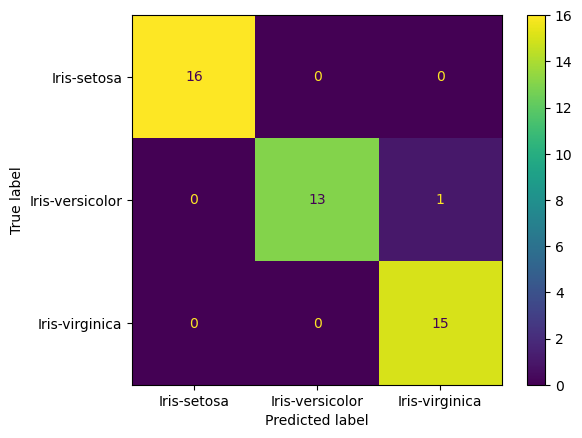

In [37]:
plot_confusion_matrix(clf,X_test,y_test)

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(df["species"])
df["species"] = labelencoder.transform(df["species"])
df["species"] = df["species"].astype(int)
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

model = GaussianNB()


model.fit(X_train, y_train)
yGas = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,yGas)*100}%" )

Accuracy score: 95.55555555555556%


In [40]:
print(labelencoder.classes_)
print(labelencoder.classes_[0])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa


In [41]:

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
X = df.drop(["species"], axis=1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=36)


In [43]:
from xgboost import XGBClassifier
model= XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
yxgb = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,yxgb)*100}%" )

Accuracy score: 97.77777777777777%


In [45]:
def predict(model, data, labelencoder):
    out = model.predict(data)
    print(out)

    # If 'out' contains class labels like 'iris-setosa', map them to integers
    if isinstance(out, (list, np.ndarray)) and all(isinstance(label, str) for label in out):
        # Create a mapping from class labels to integers
        label_to_int_mapping = {class_label: index for index, class_label in enumerate(labelencoder.classes_)}
        print(label_to_int_mapping)
        # Map the class labels to integers
        out_as_int = [label_to_int_mapping.get(label, -1) for label in out]
        print(out_as_int)

        return out_as_int

    return out  # Return 'out' as is if it's already integers or not class labels
while True:

    di = {}
    di["sepal_length"] = float(input("sepal length:  "))
    di["sepal_width"] = float(input("sepal width:  "))
    di["petal_length"] = float(input("petal length:  "))
    di["petal_width"] = float(input("petal width:  "))

    df = pd.DataFrame(di , index = [0])
    predicted_classes_as_int = predict(model, df, labelencoder)
    print(f"predicted class (as integer): {predicted_classes_as_int}")
    exit_choice = input(" DO you want to exit yes/no:").strip().lower()
    if exit_choice == 'yes':
        break

sepal length:  1.2
sepal width:  1.5
petal length:  2.2
petal width:  0.9
[0]
predicted class (as integer): [0]
 DO you want to exit yes/no:y
sepal length:  1.2
sepal width:  1.5
petal length:  1.8
petal width:  1.2
[0]
predicted class (as integer): [0]
 DO you want to exit yes/no:yes
